In [ ]:
pip install nltk networkx matplotlib


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


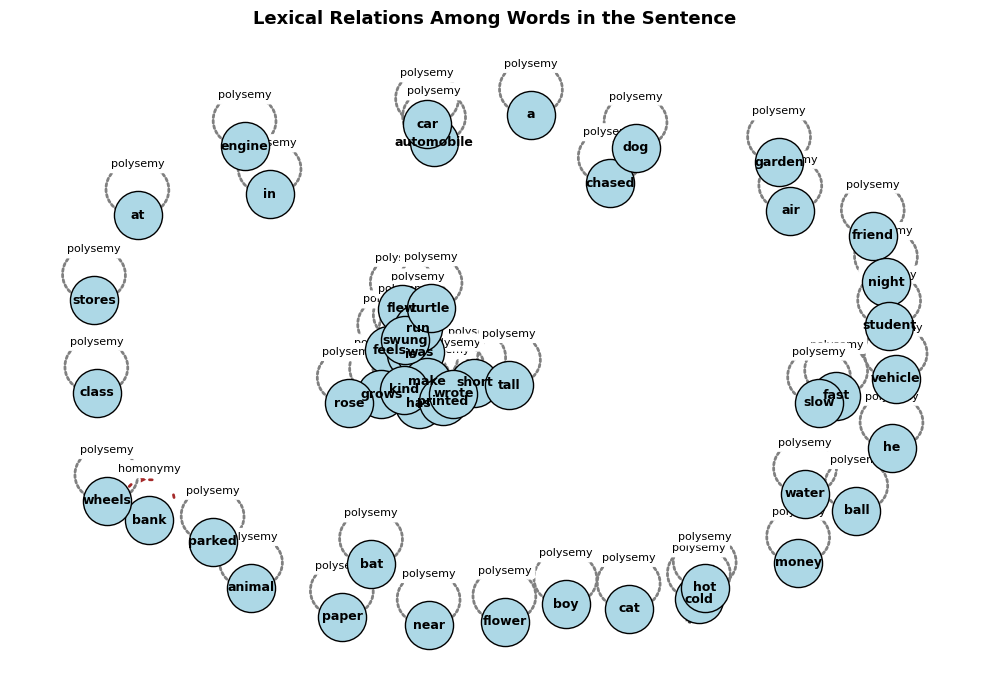

In [ ]:
# ============================================================
# Lexical Relations (Only Among Words in the Sentence)
# ============================================================

import nltk
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Download resources
# ------------------------------------------------------------
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# ------------------------------------------------------------
# Input: a meaningful simple sentence
# ------------------------------------------------------------
text = """
The car is an automobile parked near the vehicle.
The boy is tall but his friend is short.
The water is hot while the air feels cold.
The dog is an animal that chased the cat.
A rose is a kind of flower that grows in the garden.
The car has wheels and an engine that make it run.
The paper was printed, and the student wrote a paper for class.
The bank stores money near the river bank.
The bat flew in the night, and he swung a bat at the ball.
The car is fast but the turtle is slow near the river bank.
"""

# Tokenize and clean
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
unique_words = sorted(set(words))

# ------------------------------------------------------------
# Create directed graph
# ------------------------------------------------------------
G = nx.DiGraph() # creating a graph

# Define relation styles and colors
relation_styles = {
    "synonymy": ("solid", "green"),
    "antonymy": ("dashed", "red"),
    "hypernymy": ("dashdot", "orange"),
    "hyponymy": ((0, (3, 1, 1, 1)), "blue"),
    "meronymy": ("dotted", "purple"),
    "polysemy": ((0, (1, 1)), "gray"),
    "homonymy": ((0, (1, 10)), "brown")
}

# ------------------------------------------------------------
# Extract only relations among words *in the sentence*
# ------------------------------------------------------------
for w1 in unique_words:
    synsets1 = wn.synsets(w1)
    if not synsets1:
        continue

    for w2 in unique_words:
        if w1 == w2:
            continue
        synsets2 = wn.synsets(w2)
        if not synsets2:
            continue

        related = False

        # Check each relation type
        for s1 in synsets1:
            for s2 in synsets2:
                # Synonymy
                if any(l.name() == w2 for l in s1.lemmas()):
                    G.add_edge(w1, w2, relation="synonymy")
                    related = True

                # Antonymy
                for l in s1.lemmas():
                    if any(a.name() == w2 for a in l.antonyms()):
                        G.add_edge(w1, w2, relation="antonymy")
                        related = True

                # Hypernymy
                if s2 in s1.hypernyms():
                    G.add_edge(w1, w2, relation="hypernymy")
                    related = True

                # Hyponymy
                if s2 in s1.hyponyms():
                    G.add_edge(w1, w2, relation="hyponymy")
                    related = True

                # Meronymy
                if s2 in s1.part_meronyms():
                    G.add_edge(w1, w2, relation="meronymy")
                    related = True

        # Polysemy (word has >1 sense)
        if len(synsets1) > 1 and not related:
            G.add_edge(w1, w1, relation="polysemy")

# Manual homonymy example for “bank”
if "bank" in unique_words:
    senses = wn.synsets("bank")
    if len(senses) > 1:
        G.add_edge("bank", "bank", relation="homonymy")

# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1200, edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

# Draw edges with styles
for rel, (style, color) in relation_styles.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["relation"] == rel]
    if edges:
        nx.draw_networkx_edges(
            G, pos, edgelist=edges, style=style, edge_color=color, arrows=True, width=2
        )

# Edge labels
edge_labels = {(u, v): d["relation"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Lexical Relations Among Words in the Sentence", fontsize=13, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()


Use NLTK’s WordNet

Extract relations like synonymy, antonymy, hypernymy, hyponymy, meronymy, holonymy, troponymy, entailment, cause

Display results in an organized, readable format

Handle nouns, verbs, and adjectives

| **Feature**                             | **Description**                                | **Example from WordNet**                               |
| --------------------------------------- | ---------------------------------------------- | ------------------------------------------------------ |
| **Synset Name**                         | Unique ID for a particular sense (POS + index) | `car.n.01`                                             |
| **Definition (Gloss)**                  | A short description of that sense              | “A motor vehicle with four wheels…”                    |
| **Example Sentences**                   | Illustrative usage examples                    | “He needs a car to get to work.”                       |
| **Synonyms (Lemmas)**                   | Words sharing this meaning                     | `['car', 'auto', 'automobile', 'machine', 'motorcar']` |
| **Part of Speech (POS)**                | Noun (`n`), Verb (`v`), etc.                   | `n` (noun)                                             |
| **Hypernyms**                           | Broader category (“is-a”)                      | `motor_vehicle.n.01`                                   |
| **Hyponyms**                            | Narrower types (“kind-of”)                     | `['ambulance', 'police_car', 'sports_car', 'taxi']`    |
| **Meronyms**                            | Parts of the whole (“has-part”)                | `['wheel', 'engine', 'door']`                          |
| **Holonyms**                            | Wholes that include this (“part-of”)           | `['fleet', 'garage']`                                  |
| **Entailments / Troponyms (for verbs)** | (Not applicable for nouns)                     | —                                                      |


In [ ]:
# ============================================================
# WordNet Semantic Relations Explorer
# Extracts and displays all major relations for any word
# ============================================================

import nltk
from nltk.corpus import wordnet as wn

# Download WordNet data if not already
nltk.download('wordnet')
nltk.download('omw-1.4')

def explore_wordnet(word):
    synsets = wn.synsets(word)
    if not synsets:
        print(f"No entries found for '{word}' in WordNet.")
        return

    print("=" * 70)
    print(f"🔍 Word: {word}  |  Total senses found: {len(synsets)}")
    print("=" * 70)

    for idx, syn in enumerate(synsets, 1):
        print(f"\n👉 Sense {idx}: {syn.name()} ({syn.pos()})")
        print(f"Definition: {syn.definition()}")
        if syn.examples():
            print(f"Examples: {syn.examples()}")

        # 1️⃣ Synonyms
        synonyms = [lemma.name() for lemma in syn.lemmas()]
        print(f"\n🔸 Synonyms: {', '.join(synonyms)}")

        # 2️⃣ Antonyms
        antonyms = []
        for lemma in syn.lemmas():
            antonyms += [ant.name() for ant in lemma.antonyms()]
        if antonyms:
            print(f"🔹 Antonyms: {', '.join(set(antonyms))}")

        # 3️⃣ Hypernyms (is-a)
        hypers = [h.name() for h in syn.hypernyms()]
        if hypers:
            print(f"🔹 Hypernyms (more general): {', '.join(hypers)}")

        # 4️⃣ Hyponyms (kind-of)
        hypos = [h.name() for h in syn.hyponyms()[:5]]
        if hypos:
            print(f"🔹 Hyponyms (more specific): {', '.join(hypos)}")

        # 5️⃣ Meronyms
        parts = [m.name() for m in syn.part_meronyms()]
        substances = [m.name() for m in syn.substance_meronyms()]
        members = [m.name() for m in syn.member_meronyms()]
        if parts:
            print(f"🔹 Part Meronyms (has parts): {', '.join(parts)}")
        if substances:
            print(f"🔹 Substance Meronyms (made of): {', '.join(substances)}")
        if members:
            print(f"🔹 Member Meronyms (members): {', '.join(members)}")

        # 6️⃣ Holonyms
        part_hols = [m.name() for m in syn.part_holonyms()]
        substance_hols = [m.name() for m in syn.substance_holonyms()]
        member_hols = [m.name() for m in syn.member_holonyms()]
        if part_hols:
            print(f"🔹 Part Holonyms (part of): {', '.join(part_hols)}")
        if substance_hols:
            print(f"🔹 Substance Holonyms (substance of): {', '.join(substance_hols)}")
        if member_hols:
            print(f"🔹 Member Holonyms (member of): {', '.join(member_hols)}")

        # 7️⃣ Troponyms (verbs)
        if syn.pos() == 'v':
            trops = [t.name() for t in syn.hyponyms()]
            if trops:
                print(f"🔹 Troponyms (specific manner): {', '.join(trops[:5])}")

        # 8️⃣ Entailments (verbs)
        entails = [e.name() for e in syn.entailments()]
        if entails:
            print(f"🔹 Entailments (implies): {', '.join(entails)}")

        # 9️⃣ Causes (verbs)
        causes = [c.name() for c in syn.causes()]
        if causes:
            print(f"🔹 Causes: {', '.join(causes)}")

        print("-" * 70)

    print("\n✅ Completed exploration for:", word)
    print("=" * 70)


# ============================================================
# 🔧 Example Usage
# Try different words like: "car", "bank", "run", "paper", "kill", "snore"
# ============================================================

#explore_wordnet("car")
explore_wordnet("apple")
# explore_wordnet("run")
# explore_wordnet("kill")
# explore_wordnet("paper")


🔍 Word: apple  |  Total senses found: 2

👉 Sense 1: apple.n.01 (n)
Definition: fruit with red or yellow or green skin and sweet to tart crisp whitish flesh

🔸 Synonyms: apple
🔹 Hypernyms (more general): edible_fruit.n.01, pome.n.01
🔹 Hyponyms (more specific): eating_apple.n.01, crab_apple.n.03, cooking_apple.n.01
🔹 Part Holonyms (part of): apple.n.02
----------------------------------------------------------------------

👉 Sense 2: apple.n.02 (n)
Definition: native Eurasian tree widely cultivated in many varieties for its firm rounded edible fruits

🔸 Synonyms: apple, orchard_apple_tree, Malus_pumila
🔹 Hypernyms (more general): apple_tree.n.01
🔹 Part Meronyms (has parts): apple.n.01
🔹 Member Holonyms (member of): malus.n.01
----------------------------------------------------------------------

✅ Completed exploration for: apple


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# =====================================================
# Distributional Semantics (Vector Space Model) Demo
# Build a co-occurrence matrix and compute similarity
# =====================================================

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# -----------------------------------------------------
# 1️⃣ Create a small sample corpus
# -----------------------------------------------------
corpus = [
    "I drove my car to the office",
    "She bought a new automobile yesterday",
    "The bus stopped near the station",
    "The car and the bus are on the road",
    "The bank is near the river",
    "He deposited money in the bank"
]

# -----------------------------------------------------
# 2️⃣ Preprocess: Tokenize and remove stopwords
# -----------------------------------------------------
stop_words = set(stopwords.words('english'))
tokenized_sentences = [
    [w.lower() for w in word_tokenize(sent) if w.isalpha() and w.lower() not in stop_words]
    for sent in corpus
]

# -----------------------------------------------------
# 3️⃣ Build Vocabulary
# -----------------------------------------------------
vocab = sorted(set([word for sent in tokenized_sentences for word in sent]))
print("Vocabulary:", vocab)

# -----------------------------------------------------
# 4️⃣ Build Co-occurrence Matrix
# -----------------------------------------------------
window_size = 2
cooc = defaultdict(lambda: defaultdict(int))

for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):
        # look at nearby words within window
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)
        for j in range(start, end):
            if i != j:
                neighbor = sentence[j]
                cooc[word][neighbor] += 1

# Convert to matrix
matrix = np.zeros((len(vocab), len(vocab)), dtype=int)
for i, w1 in enumerate(vocab):
    for j, w2 in enumerate(vocab):
        matrix[i, j] = cooc[w1][w2]

print(matrix)

# -----------------------------------------------------
# 5️⃣ Compute Word Similarity
# -----------------------------------------------------
def get_vector(word):
    if word not in vocab:
        raise ValueError(f"'{word}' not in vocabulary")
    return matrix[vocab.index(word)].reshape(1, -1)

def similarity(w1, w2):
    v1, v2 = get_vector(w1), get_vector(w2)
    return cosine_similarity(v1, v2)[0][0]

# -----------------------------------------------------
# 6️⃣ Try it out!
# -----------------------------------------------------
print("\n--- Cosine Similarities ---")
pairs = [("car", "automobile"), ("car", "bus"), ("car", "bank"), ("bank", "river")]
for w1, w2 in pairs:
    print(f"Similarity({w1}, {w2}) = {similarity(w1, w2):.3f}")


Vocabulary: ['automobile', 'bank', 'bought', 'bus', 'car', 'deposited', 'drove', 'money', 'near', 'new', 'office', 'river', 'road', 'station', 'stopped', 'yesterday']
[[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]

--- Cosine Similarities ---
Similarity(car, automobile) = 0.000
Similarity(car, bus) = 0.250
Similarity(car, bank) = 0.000
Similarity(bank, river) = 0.354


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

# Sentence with ambiguous word
sentence = "He sat on the bank of the river."
tokens = word_tokenize(sentence)

# Apply Lesk algorithm
sense = lesk(tokens, 'bank')

print("Predicted sense:", sense)
print("Definition:", sense.definition())


Predicted sense: Synset('bank.v.07')
Definition: cover with ashes so to control the rate of burning


In [ ]:
sentence = "He went to the bank to deposit money."
tokens = word_tokenize(sentence)
sense = lesk(tokens, 'bank')
print("Definition:", sense.definition())

Definition: a container (usually with a slot in the top) for keeping money at home


In [ ]:
import spacy

# Load pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Input text
text = "Barack Obama visited Microsoft headquarters in Seattle on Monday."
doc = nlp(text)

# Extract entities
for ent in doc.ents:
    print(ent.text, "-->", ent.label_)


Barack Obama --> PERSON
Microsoft --> ORG
Seattle --> GPE
Monday --> DATE


In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Barack Obama visited Microsoft headquarters in Seattle."
doc = nlp(text)

for token in doc:
    print(f"{token.text:15}  {token.ent_iob_}  {token.ent_type_}")


Barack           B  PERSON
Obama            I  PERSON
visited          O  
Microsoft        B  ORG
headquarters     O  
in               O  
Seattle          B  GPE
.                O  


🧩 Task: Visualize CRF Features and Their Influence

We’ll:

Build a toy Named Entity Recognition (NER) dataset

Extract simple features for each word (capitalization, POS, etc.)

Train a CRF model

Visualize which features the CRF found most useful for predicting entities

In [ ]:
!pip install sklearn_crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00


In [ ]:
# ===============================================================
# CRF Feature Visualization for NER
# ===============================================================

import nltk
nltk.download('averaged_perceptron_tagger_eng')

# ===============================================================
# CRF Feature Visualization (Interactive with Plotly Tooltips)
# ===============================================================

import nltk
import sklearn_crfsuite
from sklearn_crfsuite import metrics
from nltk import pos_tag
import pandas as pd
import plotly.express as px

# ---------------------------------------------------------------
# Step 1. Sample NER Data
# ---------------------------------------------------------------
sentences = [
    [("Barack", "B-PER"), ("Obama", "I-PER"), ("visited", "O"), ("Paris", "B-LOC")],
    [("Steve", "B-PER"), ("Jobs", "I-PER"), ("founded", "O"), ("Apple", "B-ORG")],
    [("Elon", "B-PER"), ("Musk", "I-PER"), ("went", "O"), ("to", "O"), ("London", "B-LOC")],
]

# ---------------------------------------------------------------
# Step 2. Feature Extraction
# ---------------------------------------------------------------
def word2features(sent, i):
    word = sent[i][0]
    pos_tags = pos_tag([w for w, _ in sent])
    features = {
        'word.lower()': word.lower(),
        'word.istitle()': word.istitle(),
        'word.isupper()': word.isupper(),
        'word.isdigit()': word.isdigit(),
        'pos': pos_tags[i][1],
    }
    # Context features
    if i > 0:
        word1 = sent[i - 1][0]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
        })
    else:
        features['BOS'] = True
    if i < len(sent) - 1:
        word1 = sent[i + 1][0]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
        })
    else:
        features['EOS'] = True
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for _, label in sent]

X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

# ---------------------------------------------------------------
# Step 3. Train CRF Model
# ---------------------------------------------------------------
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1, c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X, y)

# ---------------------------------------------------------------
# Step 4. Extract Feature Weights
# ---------------------------------------------------------------
feat_weights = pd.DataFrame([
    {'Tag': tag, 'Feature': feat, 'Weight': weight}
    for (tag, feat), weight in crf.state_features_.items()
])
print(feat_weights)
# Pick top features for clarity
top_feats = (
    feat_weights
    .sort_values('Weight', ascending=False)
    .groupby('Tag')
    .head(7)
)

# ---------------------------------------------------------------
# Step 5. Plot Interactive Chart with Tooltips
# ---------------------------------------------------------------
fig = px.bar(
    top_feats,
    x='Weight',
    y='Feature',
    color='Tag',
    orientation='h',
    hover_data={
        'Tag': True,
        'Feature': True,
        'Weight': ':.3f'
    },
    title='🔍 CRF Feature Importance (Interactive with Tooltips)',
    labels={'Weight': 'Feature Weight', 'Feature': 'Feature Name'}
)

fig.update_layout(
    xaxis_title="Weight (Importance)",
    yaxis_title="Feature",
    hoverlabel=dict(bgcolor="white", font_size=12),
    template="plotly_white",
    height=600
)

fig.show()


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                        Tag Feature    Weight
0       word.lower():barack   B-PER  0.065169
1            word.istitle()   B-PER  0.021413
2            word.istitle()   I-PER  0.040526
3            word.istitle()       O -0.830997
4                   pos:NNP   B-PER  0.021413
5                   pos:NNP   I-PER  0.040526
6                       BOS   B-PER  1.204183
7     +1:word.lower():obama   B-PER  0.065169
8         +1:word.istitle()   B-PER  0.603985
9         +1:word.istitle()   I-PER -0.259603
10        +1:word.istitle()       O  0.786233
11       word.lower():obama   I-PER  0.067627
12   -1:word.lower():barack   I-PER  0.067627
13        -1:word.istitle()   I-PER  0.506607
14        -1:word.istitle()       O  0.601712
15        -1:word.istitle()   B-LOC -0.084973
16        -1:word.istitle()   B-ORG -0.052867
17  +1:word.lower():visited   I-PER  0.067627
18                  pos:VBD       O  1.075232
19       word.lower():paris   B-LOC  0.582329
20  -1:word.lower():visited   B-LO

🧠 First, a quick recap

Semantic Role Labelling (SRL) means:

Identifying who did what to whom, when, and where in a sentence.

Example:

“John gave Mary a book.”
→ Agent: John, Action: gave, Recipient: Mary, Theme: a book

✅ 1️⃣ Traditional (non-transformer) approaches

Before deep learning, SRL was done using classical machine learning techniques.
These methods relied on handcrafted linguistic features, not neural networks.

🌿 Traditional SRL pipeline

Parse the sentence syntactically (using a dependency or constituency parser).

Extract candidate arguments (noun phrases, verb phrases, etc.).

Build features for each word/phrase:

Part-of-Speech tags

Lemma of verb

Parse tree position

Path between verb and argument in dependency tree

Distance from predicate

Train classifiers (like SVM, CRF, or MaxEnt) to label each argument.

✅ 2️⃣ Example using spaCy (lightweight, no torch)

Although spaCy doesn’t directly offer a ready-made SRL model,
you can approximate SRL using syntactic dependency parsing and rule-based logic.

Here’s a pure spaCy-based SRL-like extraction (no deep learning, no transformer):

In [ ]:
# ===============================================================
# Semantic Role Labelling using Dependency Parsing (spaCy)
# ===============================================================
!pip install spacy -q
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

def simple_srl(sentence):
    doc = nlp(sentence)
    roles = {'Agent': None, 'Action': None, 'Theme': None, 'Recipient': None}

    # Find main verb (predicate)
    for token in doc:
        if token.pos_ == 'VERB' and token.dep_ == 'ROOT':
            roles['Action'] = token.text

            # Find subject (Agent)
            for child in token.children:
                if child.dep_ in ['nsubj', 'nsubjpass']:
                    roles['Agent'] = child.text

                # Direct Object (Theme)
                elif child.dep_ == 'dobj':
                    roles['Theme'] = child.text

                # Indirect Object (Recipient)
                elif child.dep_ == 'iobj':
                    roles['Recipient'] = child.text
    return roles

# Test
sentences = [
    "John gave Mary a book.",
    "The dog chased the ball.",
    "Alice drove the car to the office."
]

for sent in sentences:
    print(f"\n🟢 Sentence: {sent}")
    print(simple_srl(sent))



🟢 Sentence: John gave Mary a book.
{'Agent': 'John', 'Action': 'gave', 'Theme': 'book', 'Recipient': None}

🟢 Sentence: The dog chased the ball.
{'Agent': 'dog', 'Action': 'chased', 'Theme': 'ball', 'Recipient': None}

🟢 Sentence: Alice drove the car to the office.
{'Agent': 'Alice', 'Action': 'drove', 'Theme': 'car', 'Recipient': None}


| Step                                 | Logic                  |
| ------------------------------------ | ---------------------- |
| Find **main verb** (predicate)       | `token.dep_ == "ROOT"` |
| Find **subject**                     | dependency = `nsubj`   |
| Find **object (theme)**              | dependency = `dobj`    |
| Find **indirect object (recipient)** | dependency = `iobj`    |


| Aspect               | Rule-based (spaCy)          | Transformer (Deep Model)             |
| -------------------- | --------------------------- | ------------------------------------ |
| **Dependencies**     | Uses grammatical parsing    | Uses learned semantic representation |
| **Speed**            | Very fast                   | Slower                               |
| **Training needed?** | ❌ No                        | ✅ Yes (pretrained)                   |
| **Accuracy**         | Decent for simple sentences | Much better for complex language     |
| **Interpretability** | Easy                        | Black-box model                      |


Option 1: Lightweight Rule-Based Coreference Demo (works everywhere)

This doesn’t need heavy models — it just uses spaCy’s dependency parsing to guess likely coreference links.

In [ ]:
# =====================================================
# Simple Coreference Demo (Rule-based, works in Colab)
# =====================================================
!pip install spacy -q
import spacy

nlp = spacy.load("en_core_web_sm")

def simple_coref(text):
    doc = nlp(text)
    entities = []
    last_noun = None

    print(f"\n🟢 Original Text:\n{text}\n")
    print("🔍 Coreference Pairs (approximation):")

    for sent in doc.sents:
        for token in sent:
            # Remember last proper noun or noun as possible antecedent
            if token.pos_ in ["PROPN", "NOUN"]:
                last_noun = token.text
            # Map pronouns to last seen noun
            elif token.pos_ == "PRON" and last_noun:
                print(f"'{token.text}' → refers to '{last_noun}'")
                entities.append((token.text, last_noun))

    return entities


text = """Riya went to the park. She played football with her friends.
They enjoyed the evening and she promised they would come again."""

coref_pairs = simple_coref(text)



🟢 Original Text:
Riya went to the park. She played football with her friends. 
They enjoyed the evening and she promised they would come again.

🔍 Coreference Pairs (approximation):
'She' → refers to 'park'
'her' → refers to 'football'
'They' → refers to 'friends'
'she' → refers to 'evening'
'they' → refers to 'evening'
